# Neural network classification with pytorch

In [103]:
import torch
from torch import nn

import sklearn
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
import pandas as pd

In [104]:
# Make classification data and get it ready

# make 1000 samples
n_samples = 1000

# create circles
X,y = make_circles(n_samples, noise=0.03, random_state=57)

In [105]:
len(X), len(y)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")
# 2 feature of X relate to 1 label of y


First 5 X features:
[[-0.79885014 -0.21122146]
 [-0.40416824 -0.93006724]
 [ 0.35952679  0.92226024]
 [ 0.81032948  0.16657051]
 [-0.65233723 -0.77880979]]

First 5 y labels:
[1 0 0 1 0]


In [106]:
circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:,1],
                         "label" : y})

circles.head(10)

,X1,X2,label
0,-0.798850,-0.211221,1
1,-0.404168,-0.930067,0
2,0.359527,0.922260,0
3,0.810329,0.166571,1
4,-0.652337,-0.778810,0
5,-0.732504,-0.388679,1
6,0.884260,-0.508534,0
7,0.550650,0.843505,0
8,0.636806,0.733344,0
9,0.041497,-0.975589,0


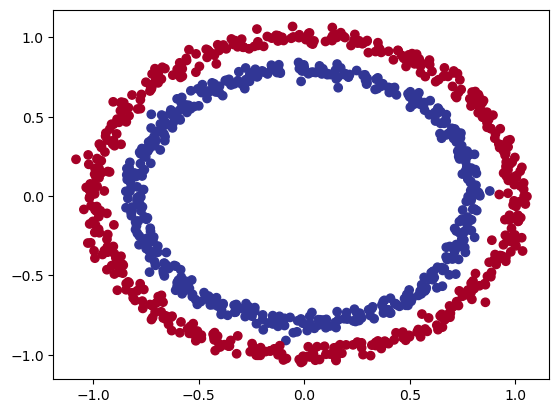

In [107]:
# Visualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [108]:
# Check ip and op shapes
X.shape, y.shape

((1000, 2), (1000,))

In [109]:
# Turn data to tensor and split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [110]:
# split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=17)

In [111]:
# Building a model

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2 nn.linear layer

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2
    

# init a instance
model_0 = CircleModelV1()
model_0


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [112]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)


model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6437,  0.1888],
                      [-0.6073,  0.0691],
                      [ 0.2852,  0.1762],
                      [ 0.5473,  0.2860],
                      [ 0.1523,  0.5196]])),
             ('0.bias', tensor([-0.5388,  0.0587, -0.2605,  0.6692,  0.4744])),
             ('1.weight',
              tensor([[-0.0659, -0.0577,  0.1797,  0.3884, -0.1026]])),
             ('1.bias', tensor([0.0773]))])

In [113]:
# Make Predcitions
with torch.inference_mode():
    untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.2904],
        [0.5160],
        [0.4815],
        [0.1266],
        [0.0908],
        [0.4668],
        [0.0812],
        [0.2447],
        [0.1059],
        [0.4628]])

First 10 test labels:
tensor([0., 0., 1., 1., 1., 0., 1., 0., 0., 1.])


In [115]:
# Loss func and optimizerr

# for regression, MAE or MSE
# for classisication binary cross entropy or categorical cross entropy

# loss_fn = nn.BCELoss() requires to have go through sigmoid prior inpiut 

loss_fn = nn.BCEWithLogitsLoss() # sigmoid activatoin function builtin


optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


In [116]:
# Accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [117]:
# Train

#Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).\

#Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

#Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

#Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

#Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).


In [118]:
# 10:15:00